## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn import svm  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_credit = pd.read_csv('C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/credit_final.csv')
df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [3]:
df_credit['credit.rating'] = df_credit['credit.rating'].astype('str')
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   credit.rating                   1000 non-null   object
 1   account.balance                 1000 non-null   int64 
 2   credit.duration.months          1000 non-null   int64 
 3   previous.credit.payment.status  1000 non-null   int64 
 4   credit.purpose                  1000 non-null   int64 
 5   credit.amount                   1000 non-null   int64 
 6   savings                         1000 non-null   int64 
 7   employment.duration             1000 non-null   int64 
 8   installment.rate                1000 non-null   int64 
 9   marital.status                  1000 non-null   int64 
 10  guarantor                       1000 non-null   int64 
 11  residence.duration              1000 non-null   int64 
 12  current.assets                  1000 non-null   i

In [4]:
df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


# x값(예측변수), y값(목표변수) 설정

In [5]:
# 목표변수와 나머지 변수들을 따로 저장

x = df_credit.iloc[ : , 1:21 ]
y = df_credit.iloc[:,0]

# 학습/테스트용 데이터셋 분리

In [6]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({'1': 495, '0': 205})

Counter({'1': 205, '0': 95})


# 모델 생성 및 학습

## 결정나무 모델 생성

In [7]:
# 의사결정트리 만들기
model_dtclf = DecisionTreeClassifier( max_depth = 4,
                                      min_samples_split = 15,
                                      random_state = 153 )

## train 데이터로 학습 수행


In [8]:
# 모델 학습
model_dtclf.fit( x_train, y_train )

DecisionTreeClassifier(max_depth=4, min_samples_split=15, random_state=153)

In [9]:
# 모델의 정답에 대한 정보 확인
model_dtclf.classes_

array(['0', '1'], dtype=object)

# 시각화

## 결정나무 시각화


In [10]:
df_credit.iloc[:,0].unique()

array(['1', '0'], dtype=object)

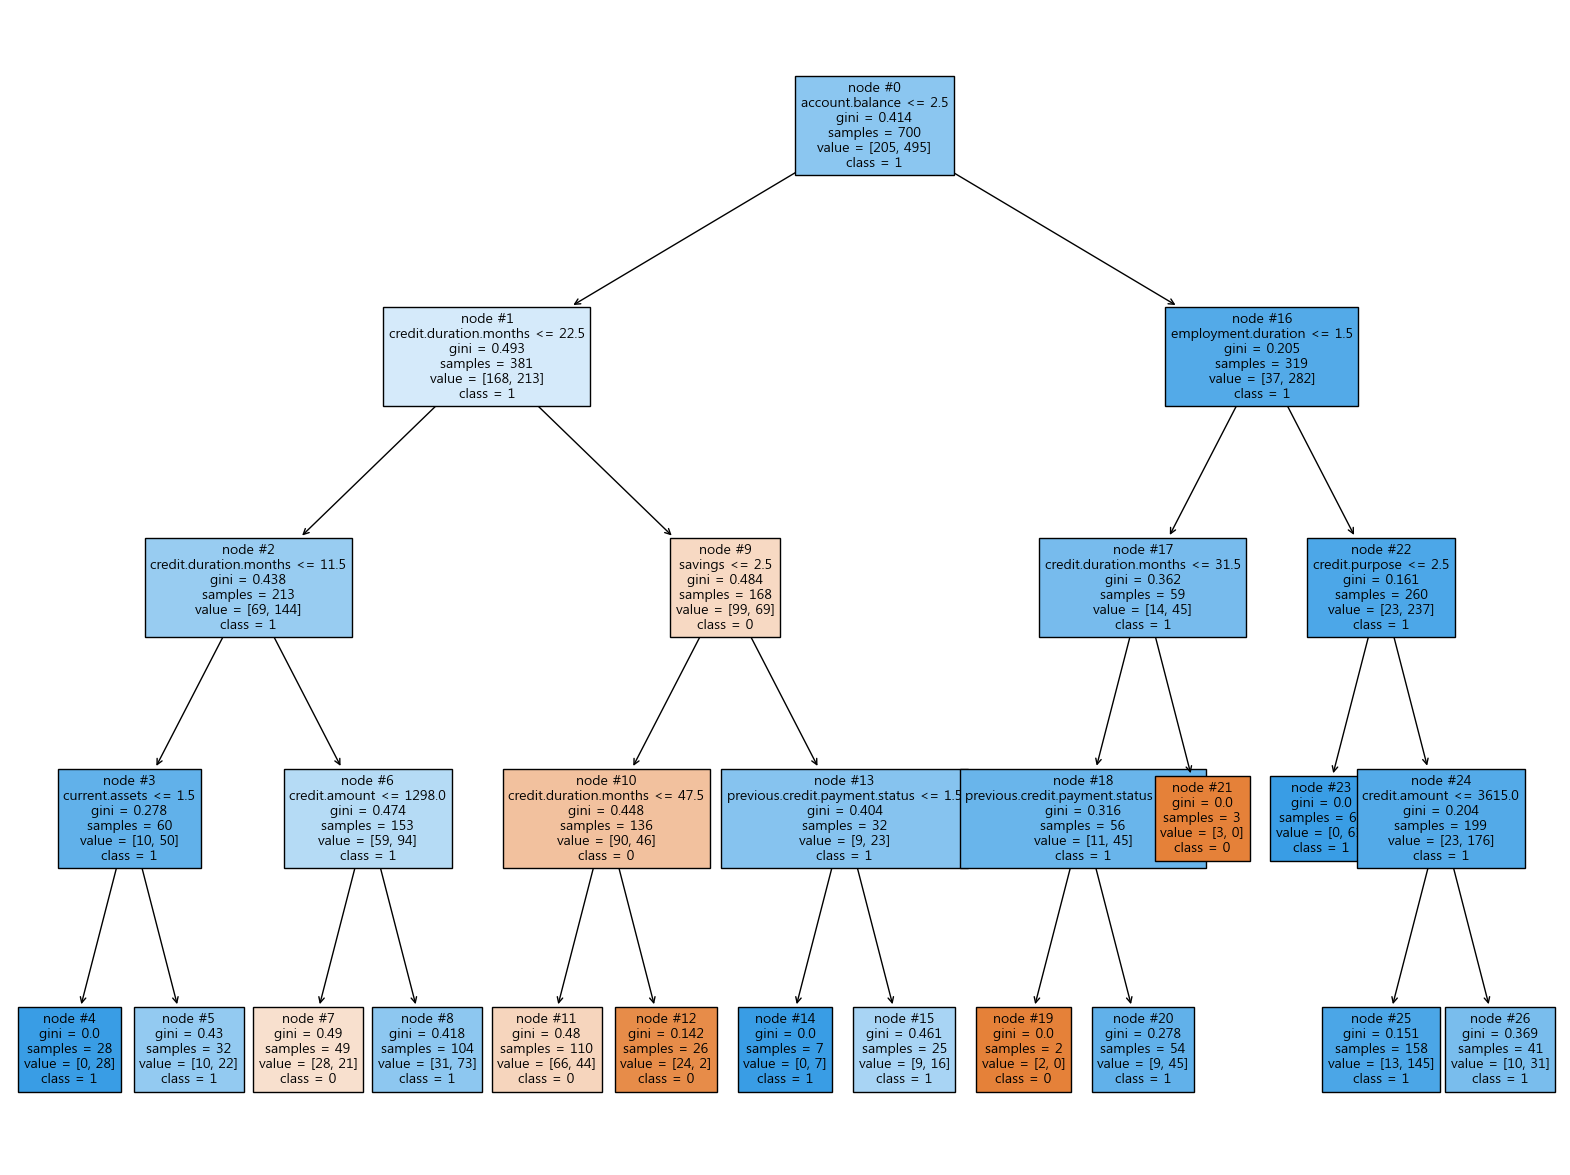

In [11]:
plt.figure( figsize=(20, 15) )

plot_tree( model_dtclf,
           class_names = model_dtclf.classes_,
           feature_names = list(df_credit.iloc[:,1:21]),
           filled = True,
           node_ids = True,
           fontsize = 10 )

plt.show()

# 모델 최적화: `GridSearchCV`


## Hyper parameter 최적화: `GridSearchCV`


In [12]:
# 파라미터 목록 확인
list( model_dtclf.get_params().keys() )

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [13]:
# 평가할 파라미터 split 조건 설정

params = { 'max_depth' : [3, 4, 5],
           'min_samples_split' : [1, 2, 3, 4, 5],
           'min_samples_leaf' : [1, 2, 3, 4, 5] }

grid = GridSearchCV( model_dtclf,
                     param_grid = params,
                     cv = 10,
                     scoring = 'accuracy')

# split 조건별로 하이퍼 파라미터 학습/평가
grid.fit( x, y )

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_split=15,
                                              random_state=153),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [14]:
df_grid = pd.DataFrame( grid.cv_results_ )

df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            75 non-null     float64
 1   std_fit_time             75 non-null     float64
 2   mean_score_time          75 non-null     float64
 3   std_score_time           75 non-null     float64
 4   param_max_depth          75 non-null     object 
 5   param_min_samples_leaf   75 non-null     object 
 6   param_min_samples_split  75 non-null     object 
 7   params                   75 non-null     object 
 8   split0_test_score        60 non-null     float64
 9   split1_test_score        60 non-null     float64
 10  split2_test_score        60 non-null     float64
 11  split3_test_score        60 non-null     float64
 12  split4_test_score        60 non-null     float64
 13  split5_test_score        60 non-null     float64
 14  split6_test_score        60 

In [15]:
pd.set_option('display.max_colwidth', None)  # 데이터프레임의 셀 폭 설정 (한 셀의 너비에 내용이 다 안들어갈 경우)
pd.set_option('display.max_row', 80)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_grid[ ['params','mean_test_score','rank_test_score'] ].sort_values(['rank_test_score'])

,params,mean_test_score,rank_test_score
69,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}",0.741,1
66,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}",0.741,1
67,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3}",0.741,1
68,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}",0.741,1
64,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}",0.739,5
61,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}",0.739,5
62,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}",0.739,5
63,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.739,5
56,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}",0.736,9
57,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}",0.736,9


In [16]:
print("최고 Score: ", str(np.round(grid.best_score_, 4)))
print("최적 Parameters: ",str(grid.best_params_))
print("최적 Estimators: ",str(grid.best_estimator_))

최고 Score:  0.741
최적 Parameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
최적 Estimators:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=153)


### 최적 Parameter 적용 결과 출력

Accuracy: 0.73


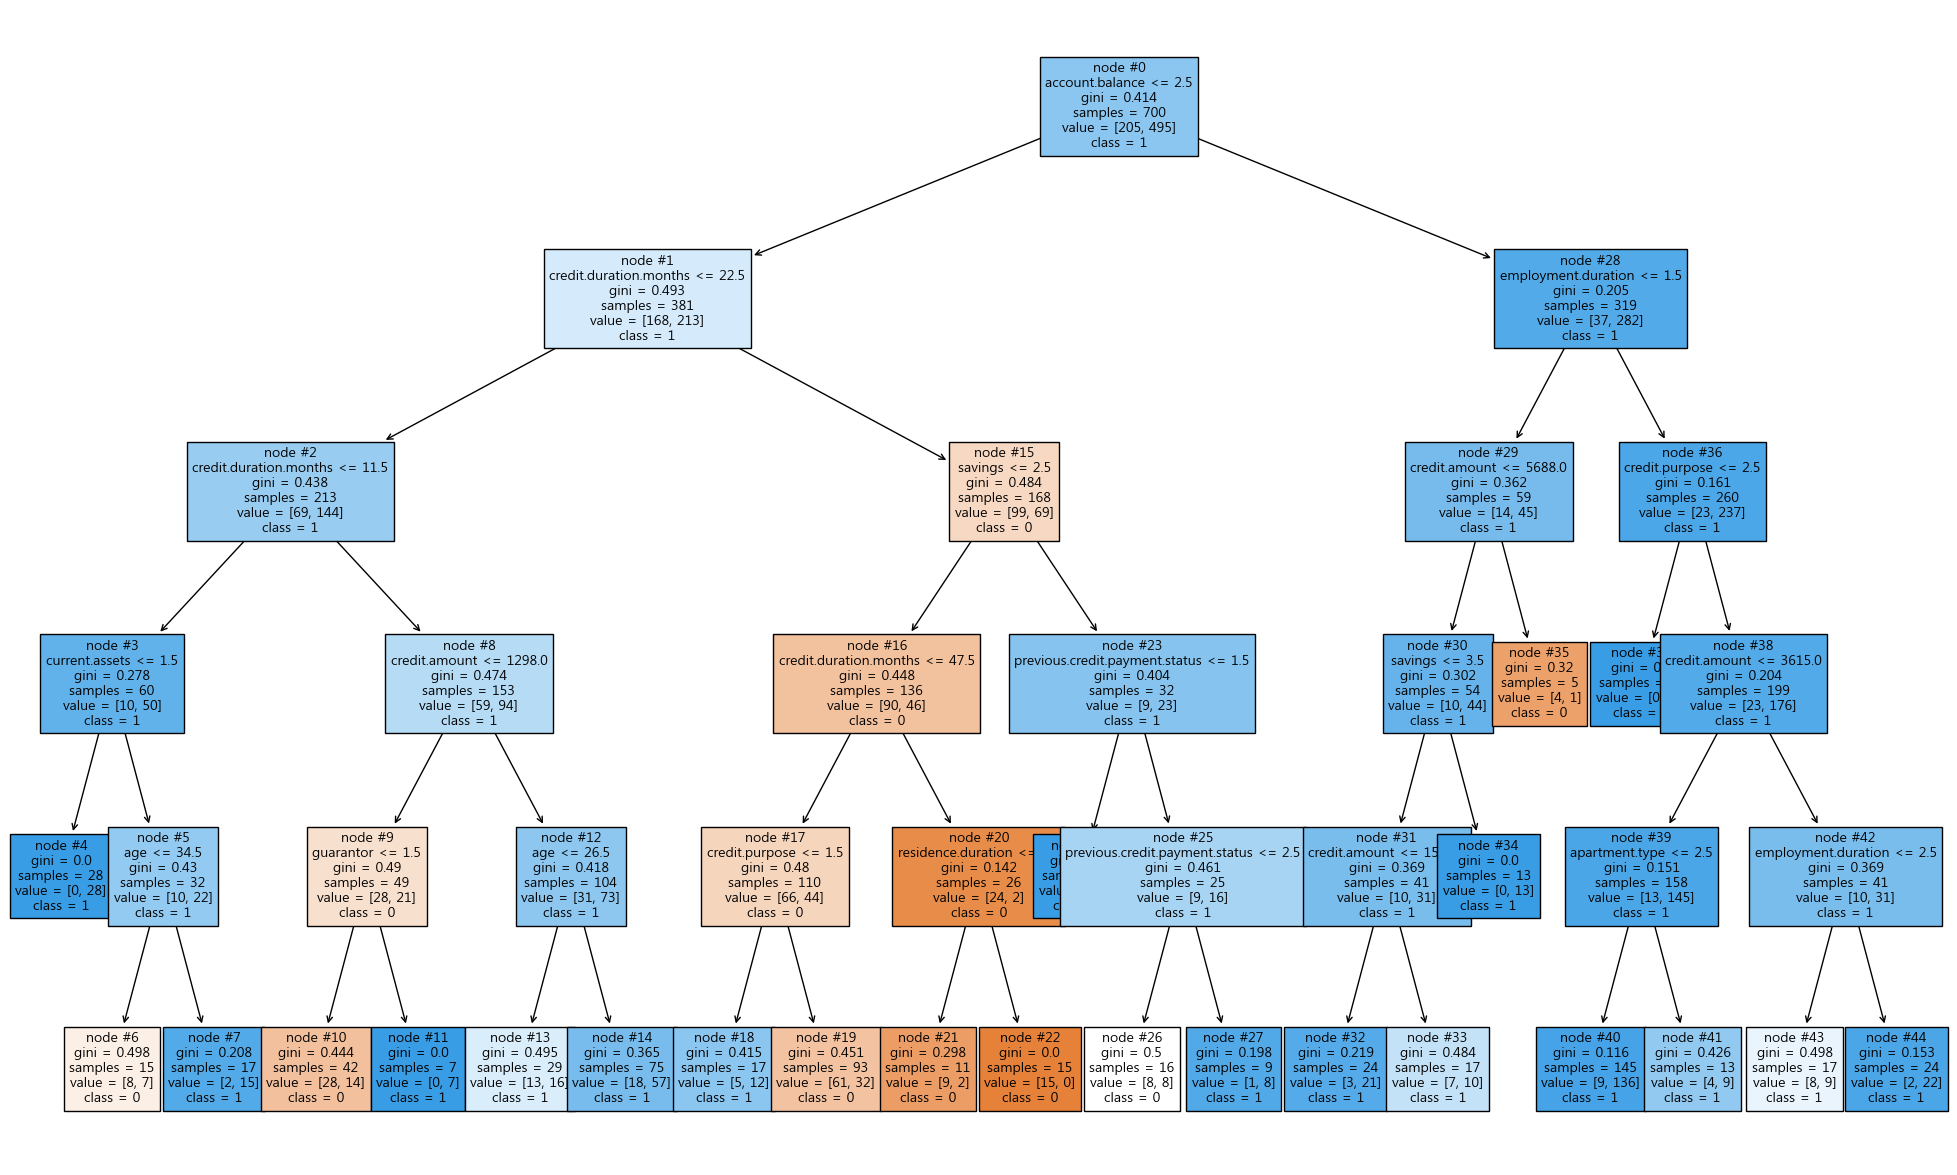

In [17]:
# 의사결정트리 생성
model_dtclf = DecisionTreeClassifier( max_depth=5, min_samples_leaf=4, min_samples_split = 2, random_state=153 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )
print( 'Accuracy:', accuracy_score(y_test, y_pred) )

plt.figure( figsize=(25, 15) )

plot_tree( model_dtclf,
           class_names = model_dtclf.classes_,
           feature_names = list(df_credit.iloc[:,1:21]),
           filled = True,
           node_ids = True,
           fontsize = 10 )

plt.show()

## 평가

### Confusion Metrix

In [18]:
confusion_matrix(y_test, y_pred)

array([[ 51,  44],
       [ 37, 168]], dtype=int64)

In [19]:
pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )

real,0,1
pred,,
0,51,44
1,37,168


### 분석 지표

In [20]:
# Accuracy
model_dtclf.score( x_test, y_test )

0.73

In [21]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.73

              precision    recall  f1-score   support

           0      0.580     0.537     0.557        95
           1      0.792     0.820     0.806       205

    accuracy                          0.730       300
   macro avg      0.686     0.678     0.682       300
weighted avg      0.725     0.730     0.727       300




### 데이터별 예측 확률

In [22]:
y_test = y_test.astype('int')
y_test

92     1
372    1
526    1
276    1
260    1
      ..
412    1
3      1
440    1
761    0
592    0
Name: credit.rating, Length: 300, dtype: int32

In [23]:
y_pred = model_dtclf.predict(x_test)

y_pred = y_pred.astype('int')

### ROC curve / AUC
- `sklearn.metrics.roc_curve()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

AUC:  0.6781771501925545


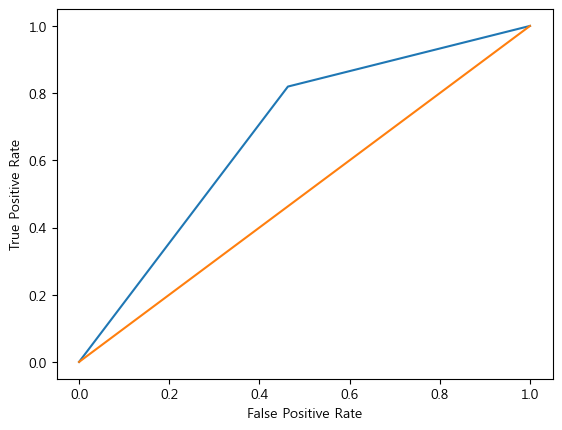

In [24]:
# AUC 계산
print('AUC: ', roc_auc_score( y_test, y_pred ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, y_pred, pos_label = 1 )

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()